In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:/Users/91979/Desktop/DA/day.csv")
#series= pd.Series.from_csv("C:/Users/91979/Desktop/DA/day.csv", header=0)
random.seed(123)
data = pd.DataFrame()
df.head(10)
#data['weekday'].max()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,lag
0,0,3/1/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,985
1,1,4/1/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,801
2,2,5/1/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1349
3,3,6/1/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,1562
4,4,7/1/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,1600
5,5,8/1/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,1606
6,6,9/1/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,1510
7,7,10/1/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,959
8,8,11/1/2011,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,822
9,9,12/1/2011,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,1321


In [3]:
rolling_mean=df.lag.rolling(window=7).mean()
df['new_cnt'] = rolling_mean
new_cnt = df['new_cnt']
new_cnt = new_cnt.dropna()
s=[]
for i in new_cnt:
    s.append(i)
print(len(s))
s.pop()
print(len(s))
df.head(10)

723
722


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,lag,new_cnt
0,0,3/1/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,985,NaN
1,1,4/1/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,801,NaN
2,2,5/1/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1349,NaN
3,3,6/1/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,1562,NaN
4,4,7/1/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,1600,NaN
5,5,8/1/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,1606,NaN
6,6,9/1/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,1510,1344.714286
7,7,10/1/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,959,1341.000000
8,8,11/1/2011,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,822,1344.000000
9,9,12/1/2011,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,1321,1340.000000


In [4]:
data = df.drop(df.index[[0,1,2,3,4,5,6]])
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,lag,new_cnt
7,7,10/1/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,959,1341.000000
8,8,11/1/2011,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,822,1344.000000
9,9,12/1/2011,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,1321,1340.000000
10,10,13/1/2011,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406,1263,1297.285714
11,11,14/1/2011,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421,1162,1234.714286


In [5]:
se = pd.Series(s)
data['new_cnt'] = se.values

In [6]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,lag,new_cnt
7,7,10/1/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,959,1344.714286
8,8,11/1/2011,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,822,1341.000000
9,9,12/1/2011,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,1321,1344.000000
10,10,13/1/2011,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406,1263,1340.000000
11,11,14/1/2011,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421,1162,1297.285714
12,12,15/1/2011,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248,1406,1234.714286
13,13,16/1/2011,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204,1421,1206.142857
14,14,17/1/2011,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000,1248,1193.428571
15,15,18/1/2011,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683,1204,1234.714286
16,16,19/1/2011,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650,1000,1289.285714


In [48]:
coln = ['season', 'mnth', 'weekday', 'weathersit']
X = data[coln].values
labelencoder = LabelEncoder()
finalDf=pd.DataFrame()
for i in range(0,len(coln)):
    X1= labelencoder.fit_transform(X[:,i])
    onehotencoder = OneHotEncoder(sparse=False)
    X1=X1.reshape(-1,1)
    X1 = onehotencoder.fit_transform(X1)
    print(X1.size)
    print(len(data))
    size=int(X1.size/len(data))
    for j in range(0,size):
        data['%s%d'%(coln[i],j)]=X1[:,j]

2888
722
8664
722
5054
722
2166
722


In [8]:

data.to_csv("C:/Users/91979/Desktop/DA/day_encoded.csv", index = False)
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weathersit0,weathersit1,weathersit2
7,7,10/1/2011,1,0,1,0,1,1,1,0.150833,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,11/1/2011,1,0,1,0,2,1,2,0.169091,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,9,12/1/2011,1,0,1,0,3,1,1,0.172727,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10,10,13/1/2011,1,0,1,0,4,1,1,0.165000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,11,14/1/2011,1,0,1,0,5,1,1,0.160870,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
12,12,15/1/2011,1,0,1,0,6,0,2,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
13,13,16/1/2011,1,0,1,0,0,0,1,0.231667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,14,17/1/2011,1,0,1,1,1,0,2,0.175833,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,15,18/1/2011,1,0,1,0,2,1,2,0.216667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,16,19/1/2011,1,0,1,0,3,1,2,0.292174,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=22)

regr_3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

regr_4 = MLPRegressor(hidden_layer_sizes=(10,),activation='relu', alpha = .001, learning_rate= 'invscaling', random_state = 3)

regr_5 = GradientBoostingRegressor(loss= 'ls', learning_rate=0.1, n_estimators=100, random_state = 1234)

In [10]:
cols_of_int=['season0', 'season1','season2', 'season3', 'mnth0', 'mnth1', 'mnth2', 'mnth3', 'mnth4','mnth5', 
             'mnth6', 'mnth7', 'mnth8', 'mnth9', 'mnth10', 'mnth11', 'weekday0', 'weekday1', 'weekday2', 'weekday3', 
             'weekday4', 'weekday5', 'weekday6', 'workingday', 'weathersit1',
             'weathersit2', 'atemp', 'hum', 'windspeed', 'lag', 'new_cnt']

In [11]:
X_train=data[cols_of_int].loc[0:356]
X_test=data[cols_of_int].loc[356:]
y_train=data.cnt.loc[0:356]
y_test=data.cnt.loc[356:]

In [12]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1234,
             subsample=1.0, verbose=0, warm_start=False)

In [13]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)
y_5 = regr_5.predict(X_test)

Decision_tree


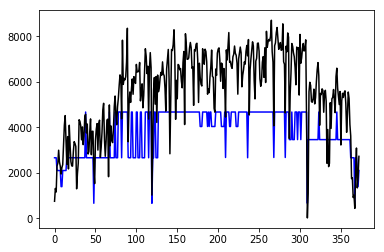

In [14]:
plt.plot(y_1,'b')
plt.plot(y_test.values,'k')
print("Decision_tree")
plt.show()

Ada_boost


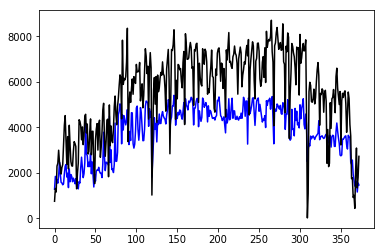

In [15]:
plt.plot(y_2,'b')
plt.plot(y_test.values,'k')
print("Ada_boost")
plt.show()

Random_forest


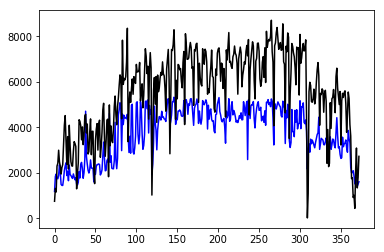

In [16]:
plt.plot(y_3,'b')
plt.plot(y_test.values,'k')
print("Random_forest")
plt.show()

Neural_network


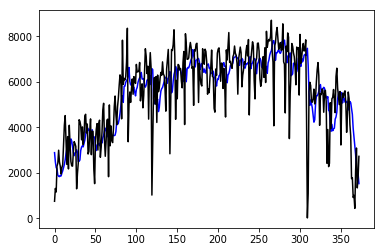

In [17]:
plt.plot(y_4,'b')
plt.plot(y_test.values,'k')
print("Neural_network")
plt.show()

Gradient_Boosting_Regressor


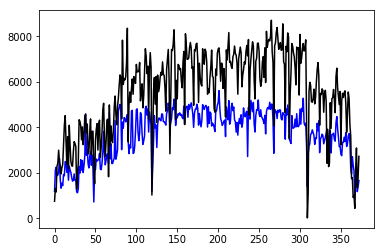

In [18]:
plt.plot(y_5,'b')
plt.plot(y_test.values,'k')
print("Gradient_Boosting_Regressor")
plt.show()

In [44]:
print("Decision_tree_MSE:",np.mean(abs(y_1-y_test)))
print("Ada_boost_MSE:", np.mean(abs(y_2-y_test)))
print("Random_forest_MSE", np.mean(abs(y_3-y_test)))
print("Neural_network_MSE", np.mean(abs(y_4-y_test)))
print("Gradient_Boosting_Regressor_MSE", np.mean(abs(y_5-y_test)))
print("NN_MSE", mean_squared_error(y_test, y_4))
print("NN_MAE", mean_absolute_error(y_test, y_4))

Decision_tree_MSE: 1883.3108322949313
Ada_boost_MSE: 1814.8671927392322
Random_forest_MSE 1848.2792225201074
Neural_network_MSE 895.0440382489408
Gradient_Boosting_Regressor_MSE 1862.4612580176927
NN_MSE 1517070.500940895
NN_MAE 895.0440382489408


In [41]:
(np.mean((y_4 - y_test)**2))**(1/2)

1231.6941588482487

In [45]:
print(len(y_test))
print(len(y_4))

373
373
